In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.utils import plot_model


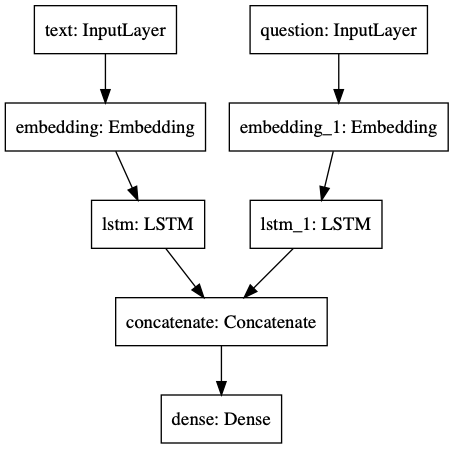

In [3]:

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500
text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = layers.Embedding(
64, text_vocabulary_size)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)
question_input = Input(shape=(None,),dtype='int32', name='question')
embedded_question = layers.Embedding(32, question_vocabulary_size)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)
concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)
answer = layers.Dense(answer_vocabulary_size,
activation='softmax')(concatenated)
model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['acc'])

plot_model(model)